In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from tqdm import tqdm
import geopy
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter

from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import os
from os import path
from PIL import Image

import nltk
import seaborn as sns

import gensim
from gensim import corpora


In [3]:
df = pd.read_csv("Census 2019.csv",encoding='latin-1')

df.head()


,Duration (in seconds),Finished,LocationLatitude,LocationLongitude,DistributionChannel,UserLanguage,Consent,Age,Relationship status,Ethnicity,...,Debt payments_2,Debt payments_3,Debt default,Debt burden,Withdraw rank,Withdraw progress,Withdraw reasons,Withdraw reasons_26_TEXT,Return likelihood,Return easier
0,421,True,42.795105,-96.925797,email,EN,"Yes, I am over 18, want to participate, and ta...",23,Single / Never married,White/Caucasian,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,480,True,37.256699,-93.294403,email,EN,"Yes, I am over 18, want to participate, and ta...",53,Married,White/Caucasian,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,361,True,39.721802,-104.895103,email,EN,"Yes, I am over 18, want to participate, and ta...",54,Married,White/Caucasian,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,356,True,32.194305,-110.976700,email,EN,"Yes, I am over 18, want to participate, and ta...",51,Married,White/Caucasian,...,No,No,"No, never been in default",No burden at all,NaN,NaN,NaN,NaN,NaN,NaN
4,496,True,44.837708,-123.251205,email,EN,"Yes, I am over 18, want to participate, and ta...",35,Prefer not to say,White/Caucasian,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.shape

(860, 179)

Text(0, 0.5, 'Portion')

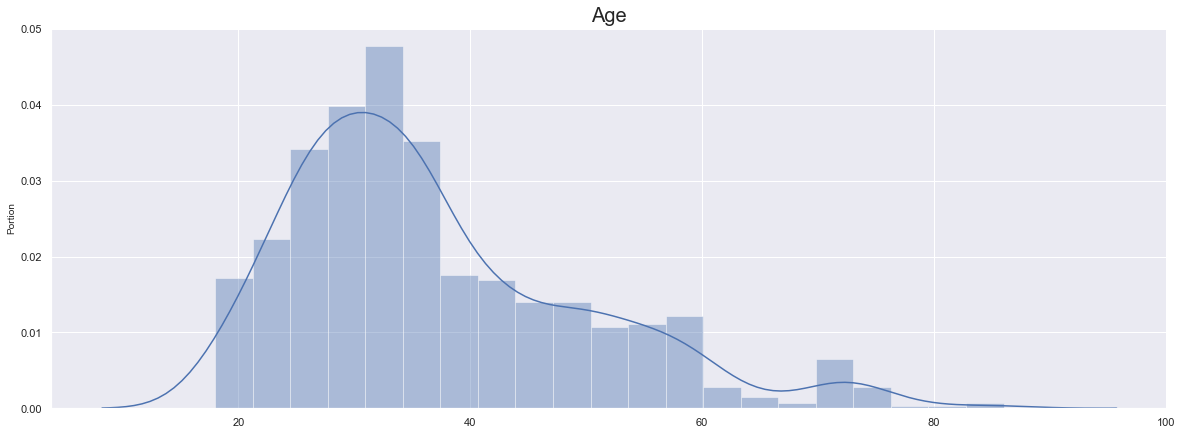

In [4]:
## Plot age distribution
plt.figure(figsize=(20,7))

sns.set(color_codes=True)
age = []
for i in range(len(df)):
    if df['Age'][i] == '86 or older':
        age.append(86)
    else:
        age.append(int(df['Age'][i]))
        
ax = sns.distplot(age)
ax.set_title("Age",fontsize = 20)
ax.set_ylabel("Portion",fontsize = 10)

In [67]:
import geopy
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter
def coordinate_To_Mapplot(df):
    states = []
    us_state_abbrev = {
        'Alabama': 'AL',
        'Alaska': 'AK',
        'American Samoa': 'AS',
        'Arizona': 'AZ',
        'Arkansas': 'AR',
        'California': 'CA',
        'Colorado': 'CO',
        'Connecticut': 'CT',
        'Delaware': 'DE',
        'District of Columbia': 'DC',
        'Florida': 'FL',
        'Georgia': 'GA',
        'Guam': 'GU',
        'Hawaii': 'HI',
        'Idaho': 'ID',
        'Illinois': 'IL',
        'Indiana': 'IN',
        'Iowa': 'IA',
        'Kansas': 'KS',
        'Kentucky': 'KY',
        'Louisiana': 'LA',
        'Maine': 'ME',
        'Maryland': 'MD',
        'Massachusetts': 'MA',
        'Michigan': 'MI',
        'Minnesota': 'MN',
        'Mississippi': 'MS',
        'Missouri': 'MO',
        'Montana': 'MT',
        'Nebraska': 'NE',
        'Nevada': 'NV',
        'New Hampshire': 'NH',
        'New Jersey': 'NJ',
        'New Mexico': 'NM',
        'New York': 'NY',
        'North Carolina': 'NC',
        'North Dakota': 'ND',
        'Northern Mariana Islands':'MP',
        'Ohio': 'OH',
        'Oklahoma': 'OK',
        'Oregon': 'OR',
        'Pennsylvania': 'PA',
        'Puerto Rico': 'PR',
        'Rhode Island': 'RI',
        'South Carolina': 'SC',
        'South Dakota': 'SD',
        'Tennessee': 'TN',
        'Texas': 'TX',
        'Utah': 'UT',
        'Vermont': 'VT',
        'Virgin Islands': 'VI',
        'Virginia': 'VA',
        'Washington': 'WA',
        'West Virginia': 'WV',
        'Wisconsin': 'WI',
        'Wyoming': 'WY'
    }

    from tqdm import tqdm
    for i in tqdm (range(len(df))):
        try:
            locator = Nominatim(user_agent= 'myGeocoder')
            location = str(df['LocationLatitude'][i])+', ' + str(df['LocationLongitude'][i])
            location = locator.reverse(location).raw['address']['state']
            location = us_state_abbrev[location]  
            states.append(location)
        except:
            pass

    dic = {}
    for key in states:
        dic[key] = dic.get(key, 0) + 1
    dic_1 = {'State': list(dic.keys()), 'Count':list(dic.values())}                      
    df_state = pd.DataFrame.from_dict(dic_1)


    url = 'https://raw.githubusercontent.com/python-visualization/folium/master/examples/data'
    state_geo = f'{url}/us-states.json'

    m = folium.Map(location=[48, -102], zoom_start=3)

    folium.Choropleth(
        geo_data=state_geo,
        name='choropleth',
        data=df_state,
        columns=['State', 'Count'],
        key_on='feature.id',
        fill_color='YlGn',
        fill_opacity=0.7,
        line_opacity=0.2,
        legend_name='Count of each State'
    ).add_to(m)

    folium.LayerControl().add_to(m)
    
    return m

In [69]:
mapplot = coordinate_To_Mapplot(df)

mapplot

100%|██████████| 860/860 [07:25<00:00,  1.93it/s]


In [55]:
def pie_Percentage_Plot(df,feature,title): 
    lst = list(df[feature])

    dic = {}
    for key in lst:
        dic[key] = dic.get(key, 0) + 1
    labels = list(dic.keys())
    sizes = list(dic.values())
    

    
    fig = plt.figure(figsize = (16,12))
    ax1 = fig.add_subplot(2,2,1)


    ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
            shadow=False, startangle=90)
    ax1.axis('equal') 
    ax1.set_title(title, fontsize = 15)
    


    plt.show()



def pie_Percentage_Plot_2(df,feature,title): 
    lst = list(df[feature])
    lst_remove_nan = df[feature].dropna()
    
    dic = {}
    for key in lst:
        dic[key] = dic.get(key, 0) + 1
    labels = list(dic.keys())
    sizes = list(dic.values())
    
    dic_remove_nan = {}
    for key in lst_remove_nan:
        dic_remove_nan[key] = dic_remove_nan.get(key, 0) + 1
    labels_2 = list(dic_remove_nan.keys())
    sizes_2 = list(dic_remove_nan.values())
    
    fig = plt.figure(figsize = (16,12))
    ax1 = fig.add_subplot(2,2,1)
    ax2 = fig.add_subplot(2,2,2)

    ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
            shadow=False, startangle=90)
    ax1.axis('equal') 
    ax1.set_title(title, fontsize = 15)
    
    
    ax2.pie(sizes_2, labels=labels_2, autopct='%1.1f%%',
            shadow=False, startangle=90)
    ax2.axis('equal') 
    ax2.set_title(title, fontsize = 15)
   


    plt.show()
    
    
    

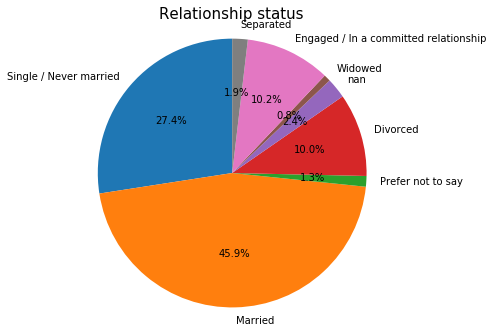

In [56]:
pie_Percentage_Plot(df,'Relationship status','Relationship status')

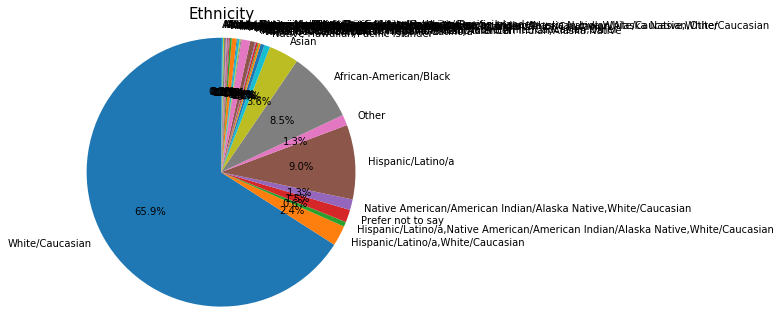

In [57]:
pie_Percentage_Plot(df,'Ethnicity','Ethnicity')

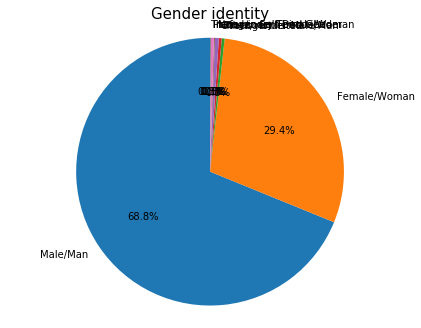

In [58]:
pie_Percentage_Plot(df,"Gender identity","Gender identity")

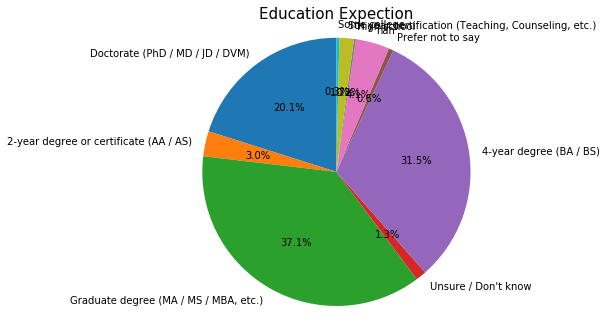

In [59]:
pie_Percentage_Plot(df,"Your Education Expection","Education Expection")

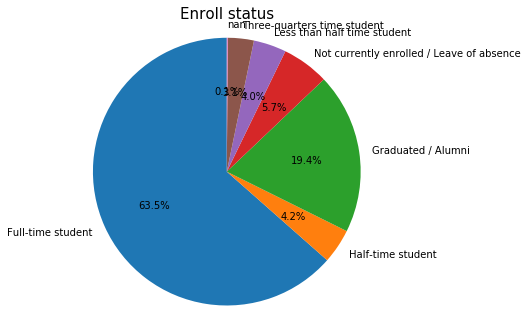

In [60]:
pie_Percentage_Plot(df,"Enroll status","Enroll status")

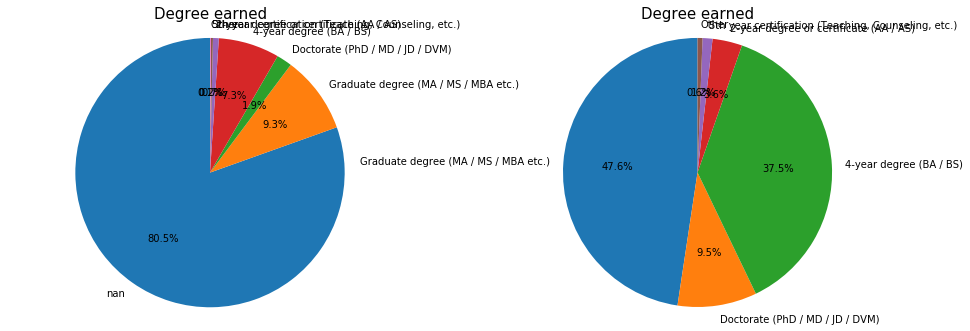

In [61]:
pie_Percentage_Plot_2(df,"Degree earned","Degree earned")

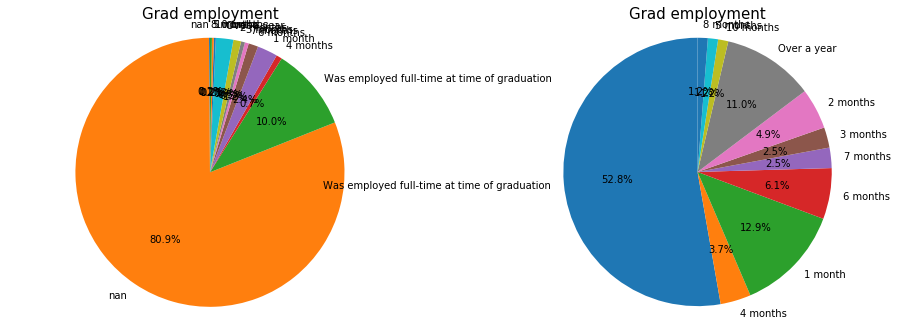

In [62]:
pie_Percentage_Plot_2(df,"Grad employment","Grad employment")

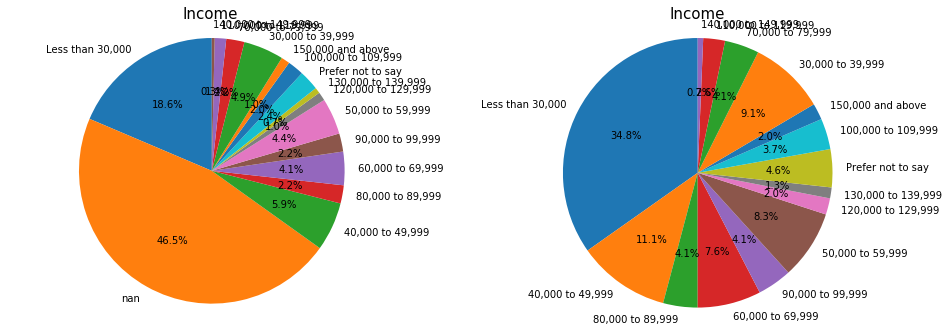

In [63]:
pie_Percentage_Plot_2(df,"Income","Income")

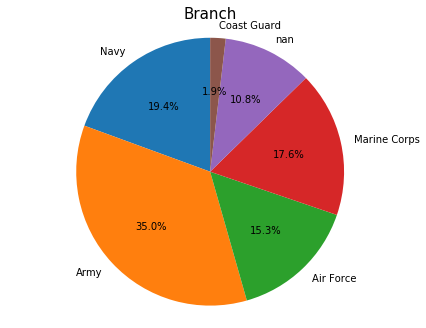

In [64]:
pie_Percentage_Plot(df,"Branch","Branch")


In [83]:
## NLP Sentiment Analysis and Topic Modeling

df_text = df[["End"]].dropna().reset_index()

df_text.head()

,index,End
0,6,Staunch advocate to get more student veterans ...
1,12,I was a founding member and am currently servi...
2,20,I was a helicopter pilot in the Marine Corps a...
3,21,Going back to school after serving can be extr...
4,32,My experience in the military allowed me to wo...


In [68]:
# Sentiment Analysis

import pandas as pd
from textblob import TextBlob
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import datetime as dt
from nltk.corpus import wordnet as wn
from nltk.stem.wordnet import WordNetLemmatizer

In [132]:
## Sentiment Analysis
def get_Sentiment(df,name):  
    sid = SentimentIntensityAnalyzer()
    df['sentiment_nltk'] = [sid.polarity_scores(i).get('compound') for i in df[name]]
    lst = []
    for i in range(len(df['sentiment_nltk'])):
        if df['sentiment_nltk'][i] > 0.3:
            lst.append('Positive')
        elif df['sentiment_nltk'][i]< -0.3:
            lst.append('Negative')
        else:
            lst.append('Neutral')
    df['sentiment'] = lst

df_text = df[["End"]].dropna().reset_index()
get_Sentiment(df_text,'End')
df_text.head()

,index,End,sentiment_nltk,sentiment
0,6,Staunch advocate to get more student veterans ...,0.4522,Positive
1,12,I was a founding member and am currently servi...,0.0000,Neutral
2,20,I was a helicopter pilot in the Marine Corps a...,0.8547,Positive
3,21,Going back to school after serving can be extr...,0.6962,Positive
4,32,My experience in the military allowed me to wo...,0.4404,Positive


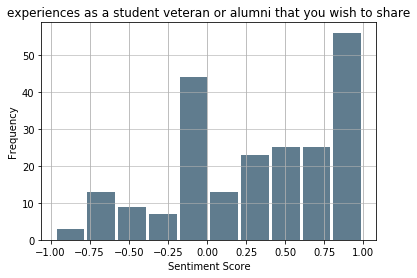

In [133]:
import matplotlib.pyplot as plt

data = df_text['sentiment_nltk']

data.plot.hist(grid=True, bins= 10, rwidth=0.9,color='#607c8e')

plt.title('experiences as a student veteran or alumni that you wish to share')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()


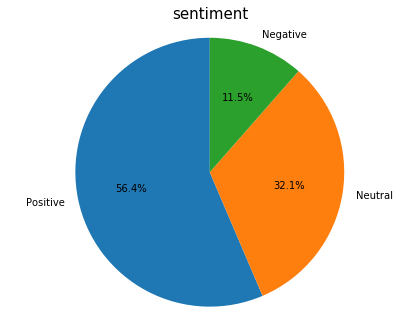

In [135]:
pie_Percentage_Plot(df_text,'sentiment','sentiment')

In [1]:
## Topic Modeling functions

import spacy
spacy.load('en')
from spacy.lang.en import English
parser = English()

def tokenize(text):
    lda_tokens = []
    tokens = parser(text)
    for token in tokens:
        if token.orth_.isspace():
            continue
        elif token.like_url:
            lda_tokens.append('URL')
        elif token.orth_.startswith('@'):
            lda_tokens.append('SCREEN_NAME')
        else:
            lda_tokens.append(token.lower_)
    return lda_tokens


def get_lemma(word):
    lemma = wn.morphy(word)
    if lemma is None:
        return word
    else:
        return lemma
    
def get_lemma2(word):
    return WordNetLemmatizer().lemmatize(word)

en_stop = set(nltk.corpus.stopwords.words('english'))

def prepare_text_for_lda(text):
    tokens = tokenize(text)
    tokens = [token for token in tokens if len(token) > 3]
    tokens = [token for token in tokens if token not in en_stop]
    tokens = [get_lemma(token) for token in tokens]
    return tokens

def word_Cloud_plot(tokenized_text,background):
    all_words = ' '.join([text for text in tokenized_text])
    wc = WordCloud(width=800,height = 500,random_state = 21,background_color=background, max_font_size = 100,max_words=100,
                    stopwords=STOPWORDS,contour_width=3, contour_color='steelblue')
    wc.generate(all_words)
    plt.figure(figsize = (10,7))
    plt.imshow(wc,interpolation = 'bilinear')
    plt.axis('off')
    plt.show()

def word_Hist(tokenized_text):
    a = nltk.FreqDist(tokenized_text)
    d = pd.DataFrame({"Wordtag": list(a.keys()),"Count": list(a.values())})
    d = d.nlargest(columns = "Count", n = 10)
    plt.figure(figsize = (16,5))
    ax = sns.barplot(data = d, x = "Wordtag", y = 'Count')
    ax.set(ylabel = 'Count')
    plt.show()
    
def get_Topic(text_data,NUM_TOPICS,topic_words):
    dictionary = corpora.Dictionary(text_data)
    corpus = [dictionary.doc2bow(text) for text in text_data]
    
    ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = NUM_TOPICS, id2word=dictionary, passes=15)
    topics = ldamodel.print_topics(num_words=topic_words)
    for topic in topics:
        print(topic)


OSError: [E050] Can't find model 'en'. It doesn't seem to be a shortcut link, a Python package or a valid path to a data directory.

In [138]:
## Get and clean the texts

text_data = []
text = df_text['End']

for i in range(len(text)):
    tokens = prepare_text_for_lda(text[i])
    text_data.append(tokens)

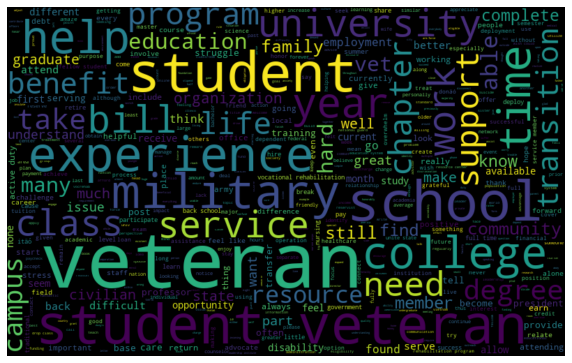

In [144]:
## Word Cloud

text_list = [j for sub in text_data for j in sub]

word_Cloud_plot(text_list)

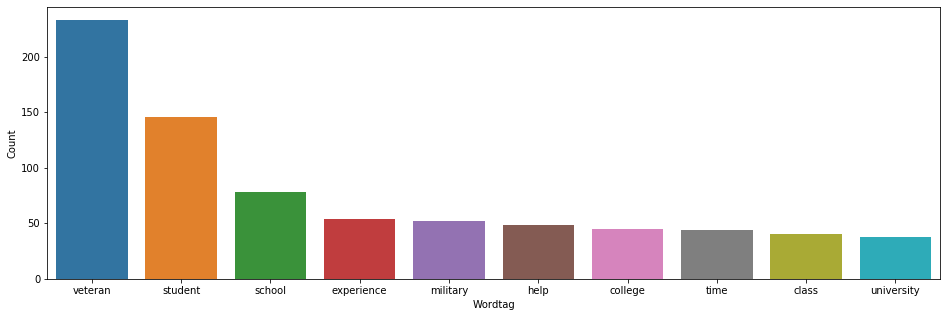

In [145]:
## word distribution

word_Hist(text_list)

In [150]:
## Get Topics

get_Topic(text_data,5,10)


(0, '0.028*"veteran" + 0.018*"student" + 0.016*"school" + 0.010*"would" + 0.009*"time" + 0.007*"military" + 0.007*"education" + 0.007*"college" + 0.007*"work" + 0.006*"bill"')
(1, '0.040*"veteran" + 0.031*"student" + 0.009*"school" + 0.008*"experience" + 0.007*"university" + 0.007*"college" + 0.006*"bill" + 0.006*"military" + 0.006*"time" + 0.006*"transition"')
(2, '0.022*"veteran" + 0.020*"student" + 0.015*"class" + 0.012*"experience" + 0.009*"school" + 0.009*"vet" + 0.007*"college" + 0.006*"take" + 0.006*"help" + 0.006*"program"')
(3, '0.033*"veteran" + 0.017*"student" + 0.014*"chapter" + 0.012*"support" + 0.009*"school" + 0.009*"need" + 0.009*"program" + 0.008*"none" + 0.008*"work" + 0.008*"campus"')
(4, '0.030*"veteran" + 0.013*"military" + 0.010*"help" + 0.009*"resource" + 0.008*"service" + 0.008*"student" + 0.008*"school" + 0.007*"member" + 0.007*"university" + 0.006*"active"')


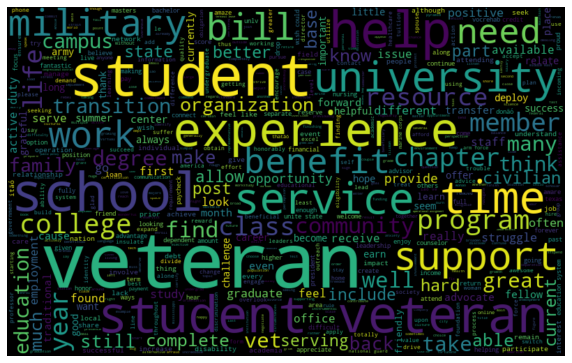

In [153]:
## Positive comment

df_positive = df_text[df_text['sentiment']=='Positive'].reset_index()

text_data = []
text = df_positive['End']

for i in range(len(text)):
    tokens = prepare_text_for_lda(text[i])
    text_data.append(tokens)
text_list = [j for sub in text_data for j in sub]

word_Cloud_plot(text_list)

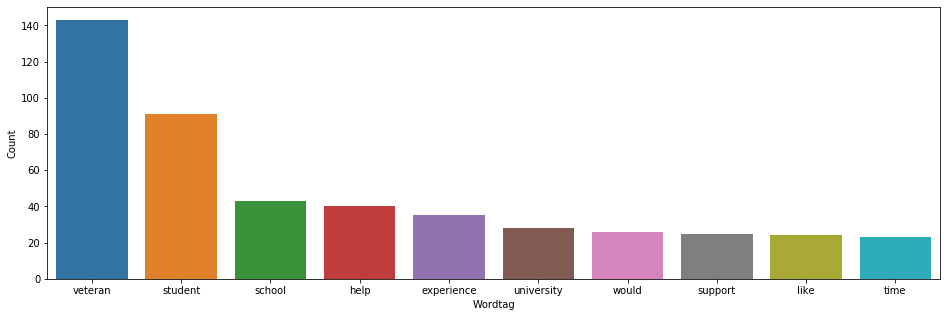

In [154]:
## word distribution

word_Hist(text_list)

In [155]:
get_Topic(text_data,5,10)



(0, '0.035*"veteran" + 0.026*"student" + 0.011*"school" + 0.010*"university" + 0.010*"program" + 0.008*"benefit" + 0.007*"military" + 0.007*"family" + 0.007*"time" + 0.007*"experience"')
(1, '0.028*"veteran" + 0.020*"help" + 0.012*"would" + 0.010*"school" + 0.010*"like" + 0.009*"class" + 0.009*"office" + 0.007*"support" + 0.007*"also" + 0.007*"available"')
(2, '0.034*"veteran" + 0.019*"student" + 0.009*"help" + 0.008*"work" + 0.007*"resource" + 0.007*"like" + 0.007*"time" + 0.007*"education" + 0.006*"current" + 0.006*"need"')
(3, '0.023*"veteran" + 0.022*"student" + 0.012*"experience" + 0.010*"would" + 0.009*"support" + 0.009*"help" + 0.008*"state" + 0.008*"feel" + 0.007*"years" + 0.007*"different"')
(4, '0.014*"school" + 0.011*"veteran" + 0.008*"find" + 0.008*"education" + 0.006*"complete" + 0.006*"better" + 0.006*"work" + 0.006*"civilian" + 0.006*"service" + 0.006*"experience"')


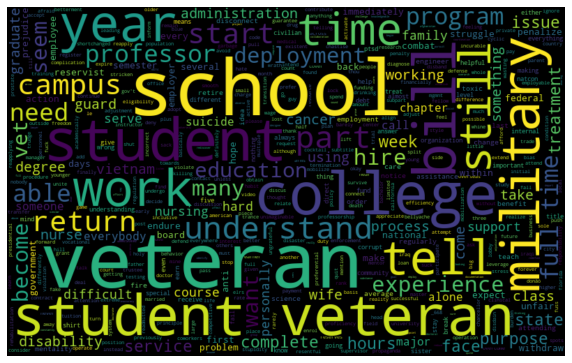

In [156]:
## Negative comment

df_Negative = df_text[df_text['sentiment']=='Negative'].reset_index()

text_data = []
text = df_Negative['End']

for i in range(len(text)):
    tokens = prepare_text_for_lda(text[i])
    text_data.append(tokens)
text_list = [j for sub in text_data for j in sub]

word_Cloud_plot(text_list)

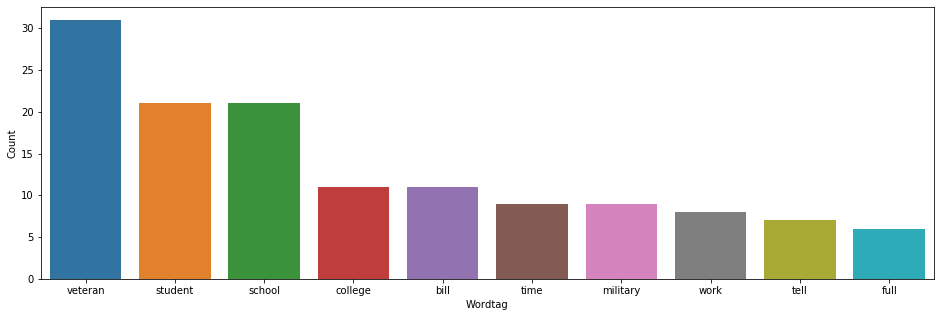

In [157]:
## word distribution

word_Hist(text_list)

In [159]:
get_Topic(text_data,7,15)

(0, '0.032*"school" + 0.027*"veteran" + 0.027*"bill" + 0.027*"tell" + 0.016*"student" + 0.016*"chapter" + 0.011*"program" + 0.011*"difficult" + 0.011*"title" + 0.011*"state" + 0.006*"using" + 0.006*"understand" + 0.006*"part" + 0.006*"would" + 0.006*"also"')
(1, '0.053*"veteran" + 0.039*"student" + 0.017*"military" + 0.011*"college" + 0.011*"treatment" + 0.009*"purpose" + 0.009*"process" + 0.009*"service" + 0.009*"campus" + 0.006*"school" + 0.006*"deployment" + 0.006*"program" + 0.006*"disability" + 0.006*"national" + 0.006*"understand"')
(2, '0.019*"school" + 0.019*"corrupt" + 0.019*"mind" + 0.010*"veteran" + 0.010*"need" + 0.010*"service" + 0.010*"immediately" + 0.010*"everybody" + 0.010*"like" + 0.010*"special" + 0.010*"going" + 0.010*"tell" + 0.010*"serve" + 0.010*"always" + 0.010*"every"')
(3, '0.027*"years" + 0.018*"college" + 0.014*"class" + 0.014*"vietnam" + 0.014*"return" + 0.014*"wife" + 0.014*"complete" + 0.009*"full" + 0.009*"campus" + 0.009*"still" + 0.009*"time" + 0.009*"

In [162]:
df_Negative['End'].to_list()

["My disability is killing me and my college experience. I'm doing ok academically but it is an every day struggle to push through medical condition",
 "    I started college full time, while working full time, immediately after returning from combat in Vietnam.   I endured all the anti-war propaganda on campus, and the wrath of professors who didn't want me in their class.   I got three A's and a B my first semester, and went on to a Master's degree, but still continued to find anti-military bias on campus.  I am still resentful that so many in college do not understand and appreciate what veterans have contributed.",
 'There needs to be an action across the board for when Reservists and National Guard students are pulled out of school due to a deployment or national disaster. Some colleges have a policy put into place, the one I attend just finally started a procedure that these students undergo to make it a smooth process to withdraw and be able to come back in the near future. ',
 

In [168]:
df['End'] = df['End'].fillna('Nan')

df_text_all = df[df['End']!='Nan'].reset_index()

get_Sentiment(df_text_all,'End')

df_text_all.head()

,index,Duration (in seconds),Finished,LocationLatitude,LocationLongitude,DistributionChannel,UserLanguage,Consent,Age,Relationship status,...,Debt default,Debt burden,Withdraw rank,Withdraw progress,Withdraw reasons,Withdraw reasons_26_TEXT,Return likelihood,Return easier,sentiment_nltk,sentiment
0,6,493,True,41.701004,-71.519402,email,EN,"Yes, I am over 18, want to participate, and ta...",36,Single / Never married,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.4522,Positive
1,12,503,True,39.641205,-119.873505,email,EN,"Yes, I am over 18, want to participate, and ta...",38,Married,...,"No, never been in default",No burden at all,NaN,NaN,NaN,NaN,NaN,NaN,0.0000,Neutral
2,20,988,True,41.970398,-87.703598,email,EN,"Yes, I am over 18, want to participate, and ta...",74,Married,...,"No, never been in default",No burden at all,NaN,NaN,NaN,NaN,NaN,NaN,0.8547,Positive
3,21,655,True,42.339905,-71.124496,email,EN,"Yes, I am over 18, want to participate, and ta...",31,NaN,...,"No, never been in default",Minor burden,NaN,NaN,NaN,NaN,NaN,NaN,0.6962,Positive
4,32,535,True,38.760895,-121.286697,email,EN,"Yes, I am over 18, want to participate, and ta...",54,Married,...,"No, never been in default",No burden at all,NaN,NaN,NaN,NaN,NaN,NaN,0.4404,Positive


In [170]:
df_text_positive = df_text_all[df_text_all['sentiment'] == 'Positive']
df_text_negative = df_text_all[df_text_all['sentiment'] == 'Negative']

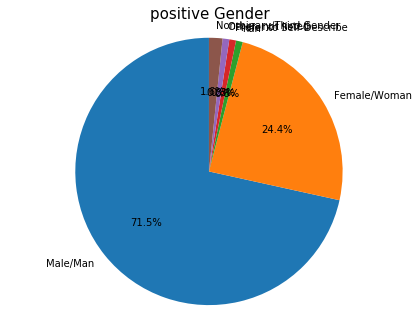

In [174]:
pie_Percentage_Plot(df_text_positive, 'Gender identity','positive Gender')

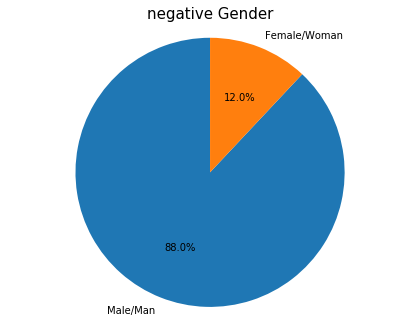

In [175]:
pie_Percentage_Plot(df_text_negative, 'Gender identity','negative Gender')

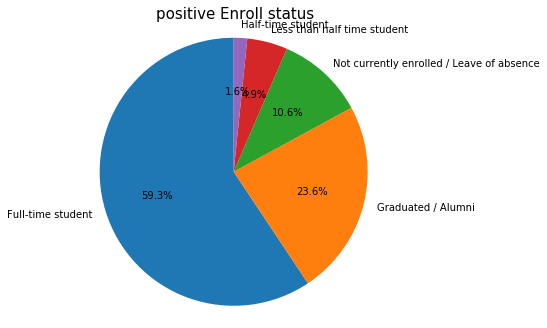

In [176]:
pie_Percentage_Plot(df_text_positive, 'Enroll status','positive Enroll status')

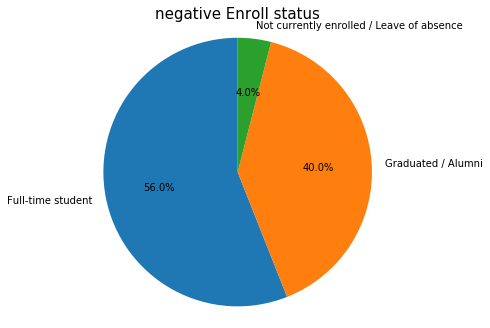

In [177]:
pie_Percentage_Plot(df_text_negative, 'Enroll status','negative Enroll status')